In [2]:
from ipywidgets import widgets
from ipywidgets import interactive
from IPython.display import display, HTML
from pivottablejs import pivot_ui

import csv
import numpy as np
import pandas as pd
import os, sys
import subprocess
import base64 #for createdownloadlink

data_folder = '../new-data/'
dci_data_folder = data_folder+'DCI/all-combined/'
dci_index_crimes = dci_data_folder+'index-offenses/'
dfs_afcars_data_file = data_folder+'DFS/DFS_12-16-AFCARS-CLEAN.csv'
dfs_county_data_file = data_folder+'DFS/DFS_12-16-Placements-ByCounty-CLEAN.csv'
dfs_plc_data_file = data_folder+'DFS/DFS_12-16-Placements-ByPLC-CLEAN.csv'
school_discipline_data_file = data_folder+'school-discipline/SchoolDiscipline_2007-17_Combined-CSV2.csv'

#found:https://stackoverflow.com/questions/31893930/download-csv-from-an-ipython-notebook
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
#end found

#Functions to get data frames
def getOverview():#DONE
    gather_overview_frames = []
    current_path = dci_data_folder+'overview/'
    year_files = next(os.walk(current_path))[2]
    for f in year_files:#process each file for this year
        file_path = current_path+'/'+f
        year = f.split('-')[0]
        try:
            df = pd.read_csv(file_path,sep=',',header='infer',index_col=0)
            df.assign(Year=year)
            gather_overview_frames.append(df)
        except Exception as e:
            print('cant load file: '+file_path)
            print('['+str(e)+']')
            print('*****************************************************************************************')
    return pd.concat(gather_overview_frames)

def getDFS():
    afcars = pd.read_csv(dfs_afcars_data_file,sep=',',header='infer',index_col=0)
    county = pd.read_csv(dfs_county_data_file,sep=',',header='infer',index_col=0)
    plc = pd.read_csv(dfs_plc_data_file,sep=',',header='infer',index_col=0)
    return afcars, county, plc

def getSchool():
    return pd.read_csv(school_discipline_data_file,sep=',',header='infer')

#fix this to dynamically load files
def getIndexCrimes():
    obj1 = pd.read_csv(dci_index_crimes+'2016-index-cp-after.csv',sep=',',header='infer')
    obj1['year']='2016'
    obj2 = pd.read_csv(dci_index_crimes+'2015-index-cp-after.csv',sep=',',header='infer')
    obj2['year']='2015'
    obj3 = pd.read_csv(dci_index_crimes+'2014-index-cp-after.csv',sep=',',header='infer')
    obj3['year']='2014'
    #newobj = obj['2016']#+obj['2015']+obj['2014']
    newobj = pd.concat([obj1,obj2,obj3])
    return newobj
    #return pd.read_csv(dci_index_crimes+'2016-index-cp-after.csv',sep=',',header='infer')

In [3]:
overview=getOverview()
dfs = getDFS()
school = getSchool()
school['County']=school['DISTRICT_NAME'].str.split('#').str[0]
index_crimes = getIndexCrimes()
#display(index_crimes.loc[index_crimes['county'].str.upper()=='ALBANY COUNTY TOTALS'])
#new = school[school['DISTRICT_NAME']]
display(school)
# display(HTML(overview.to_html()))

,DISTRICT_ID,DISTRICT_NAME,Beginning Year,End Year,Expulsion - Services not provided,Expulsion - Services provided,In school suspension,Out of school suspension,County
0,101000,Albany #1,2007,2008,NaN,NaN,35.0,154.0,Albany
1,201000,Big Horn #1,2007,2008,NaN,NaN,22.0,23.0,Big Horn
2,202000,Big Horn #2,2007,2008,NaN,NaN,2.0,45.0,Big Horn
3,203000,Big Horn #3,2007,2008,NaN,NaN,74.0,39.0,Big Horn
4,204000,Big Horn #4,2007,2008,NaN,NaN,7.0,16.0,Big Horn
5,301000,Campbell #1,2007,2008,1.0,NaN,259.0,55.0,Campbell
6,401000,Carbon #1,2007,2008,NaN,NaN,429.0,282.0,Carbon
7,402000,Carbon #2,2007,2008,NaN,NaN,29.0,20.0,Carbon
8,501000,Converse #1,2007,2008,NaN,NaN,41.0,45.0,Converse
9,502000,Converse #2,2007,2008,NaN,NaN,22.0,49.0,Converse


Dropdown(description='County:', options=('Albany ', 'Big Horn ', 'Campbell ', 'Carbon ', 'Converse ', 'Crook '…

IntRangeSlider(value=(2013, 2015), max=2017, min=2012)

county changed to:Crook --Crook 


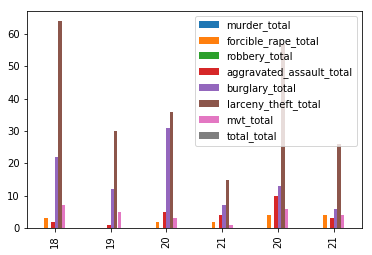

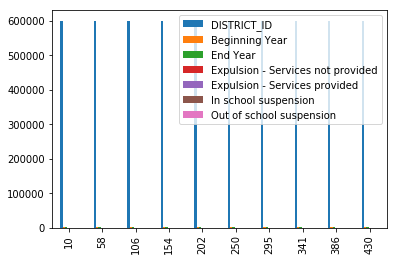

changed year(2013, 2014)


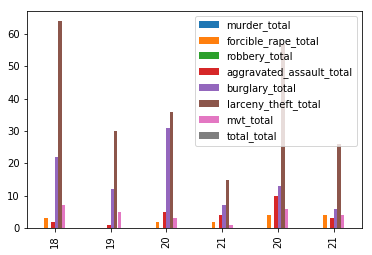

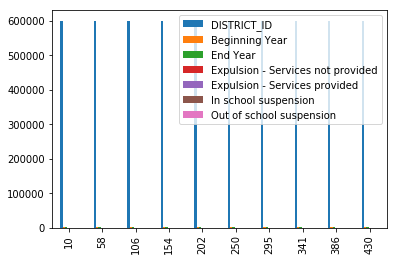

changed year(2013, 2016)


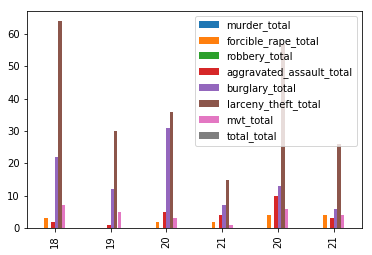

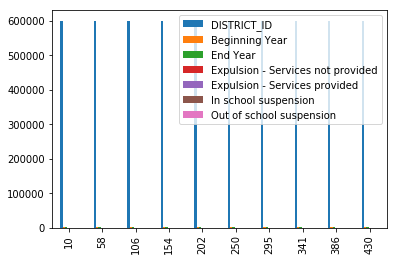

In [4]:
#def getIndexOffenses():
import matplotlib.pyplot as plt
county_drop = widgets.Dropdown(
    options=school.County.unique().tolist(),
    description='County:',
    disabled=False,
)

year_slide = widgets.IntRangeSlider(min=2012,max=2017,step=1)

#graph objects
index_graph = ''
education_graph = ''

def graph_index_crimes(begin,end,county):
    #index_crimes['2016'].plot(type='bar')
    totals_fields = ['murder_total','forcible_rape_total','robbery_total','aggravated_assault_total','burglary_total','larceny_theft_total','mvt_total','total_total']
    #index_graph.close()
    index_graph = index_crimes[totals_fields].loc[index_crimes['county'].str.contains(county.upper())].plot(kind='bar')
    
def graph_education(county):
    #education_graph = school.loc[school['County'].str.contains(county.upper())].plot(kind='bar')
    school.loc[school['County'].str.contains(county)].plot(kind='bar')
    
def county_changed(change):
    plt.close('all')
    print('county changed to:'+str(change['new'])+'--'+str(county_drop.value))
    #print('year is'+str(year_slide.value[0]))
    graph_index_crimes(year_slide.value[0],year_slide.value[1],county_drop.value)
    graph_education(county_drop.value)
    #print(school.loc[change['new'] in school['DISTRICT_NAME']])
    #countyDF = school[school['DISTRICT_NAME'].str.match(change['new'])]
    #noServices = countyDF['Expulsion - Services not provided'].sum()
    #services = countyDF['Expulsion - Services provided'].sum()
    #countyDF.plot(x='Beginning Year',y='Out of school suspension')

def year_changed(change):
    plt.close('all')
    print('changed year'+str(change['new']))
    graph_index_crimes(year_slide.value[0],year_slide.value[1],county_drop.value)
    graph_education(county_drop.value)
    
county_drop.observe(county_changed, names='value')
year_slide.observe(year_changed,names='value')

display(county_drop)
display(year_slide)

<Figure size 432x288 with 0 Axes>

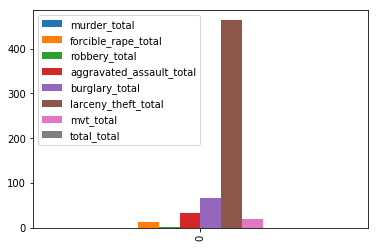

In [5]:
plt.figure()
#index_crimes['2016'].plot(type='bar')
totals_fields = ['murder_total','forcible_rape_total','robbery_total','aggravated_assault_total','burglary_total','larceny_theft_total','mvt_total','total_total']
index_crimes[totals_fields].loc[index_crimes['county']=='Albany County Totals'].plot(kind='bar')
